# APS1070
#### Basic Principles and Models - Lab 1
**Deadline: Jan 24, 23:59 - 10 points**

Name: Sai Anirudh Basamsetty

Student ID:

##**Marking Scheme:**

This project is worth **10 marks** of your final grade.

**One (1) mark** of the lab is dedicated to **vectorized coding**. If you need to write a loop in your solution, think about how you can implement the same functionality with vectorized operations. Try to avoid loops as much as possible (in some cases loops are inevitable).

This notebook is composed of two sections, a Tutorial, and an Exercise. 

The TAs in the lab will help you to complete your tutorial (Although no mark is assigned to the **tutorial** compeleting that section is **mandatory**). 

**The exercise** section is worth **9 points**.


##Tutorial
In this lab, we will be using the popular machine learning library [scikit-learn](https://scikit-learn.org/stable/) in tandem with a popular scientific computing library in Python, [NumPy](https://www.numpy.org/), to investigate basic machine learning principles and models. The topics that will be covered in this lab include:
* Introduction to scikit-learn and NumPy
* Data preparation and cleaning with Pandas
* Exploratory data analysis (EDA)
* Nearest neighbors classification algorithm

*Note:* Some other useful Python libraries include [matplotlib](https://matplotlib.org/) (for plotting/graphing) and [Pandas](https://pandas.pydata.org/) (for data analysis), though we won't be going into detail on these in this bootcamp. 

##### Jupyter Notebooks
This lab will be using [Jupyter Notebooks](https://jupyter.org/) as a Python development environment. Hopefully you're somewhat familiar with them. Write your code in *cells* (this is a cell!) and execute your code by pressing the *play* button (up top) or by entering *ctrl+enter*. To format a cell for text, you can select "Markdown" from the dropdown - the default formatting is "Code", which will usually be what you want.

#### Getting started
Let's get started. First, we're going to test that we're able to import the required libraries.  
**>> Run the code in the next cell** to import scikit-learn and NumPy.

In [0]:
import numpy as np
import sklearn 

### NumPy Basics

Great. Let's move on to our next topic: getting a handle on NumPy basics. You can think of NumPy as sort of like a MATLAB for Python (if that helps). The main object is multidimensional arrays, and these come in particularly handy when working with data and machine learning algorithms.

Let's create a 2x4 array containing the numbers 1 through 8 and conduct some basic operations on it.  
**>> Run the code in the next cell to create and print the array.***

In [0]:
array = np.arange(8).reshape(2,4)
array

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

We can access the shape, number of dimensions, data type, and number of elements in our array as follows:  
*(Tip: use "print()" when you want a cell to output more than one thing, or you want to append text to your output, otherwise the cell will output the last object you call, as in the cell above)*

In [0]:
print ("Shape:", array.shape)
print ("Dimensions:", array.ndim)
print ("Data type:" , array.dtype.name)
print ("Number of elements:", array.size)

Shape: (2, 4)
Dimensions: 2
Data type: int64
Number of elements: 8


If we have a Python list containing a set of numbers, we can use it to create an array:  
*(Tip: if you click on a function call, such as array(), and press "shift+tab" the Notebook will provide you all the details of the function)*

In [0]:
mylist = [0, 1, 1, 2, 3, 5, 8, 13, 21]
myarray = np.array(mylist)
myarray

array([ 0,  1,  1,  2,  3,  5,  8, 13, 21])

And we can do it for nested lists as well, creating multidimensional NumPy arrays:

In [0]:
my2dlist = [[1,2,3],[4,5,6]]
my2darray = np.array(my2dlist)
my2darray

array([[1, 2, 3],
       [4, 5, 6]])

We can also index and slice NumPy arrays like we would do with a Python list or another container object as follows:

In [0]:
array = np.arange(10)
print ("Originally: ", array)
print ("First four elements: ", array[:4])
print ("After the first four elements: ", array[4:])
print ("The last element: ", array[-1])

Originally:  [0 1 2 3 4 5 6 7 8 9]
First four elements:  [0 1 2 3]
After the first four elements:  [4 5 6 7 8 9]
The last element:  9


And we can index/slice multidimensional arrays, too.

In [0]:
array = np.array([[1,2,3],[4,5,6]])
print ("Originally: ", array)
print ("First row only: ", array[0,:])
print ("First column only: ", array[:,0])

Originally:  [[1 2 3]
 [4 5 6]]
First row only:  [1 2 3]
First column only:  [1 4]


#### Sneak preview

Often, when designing a machine learning classifier, it can be useful to compare an array of predictions (0 or 1 values) to another array of true values. We can do this pretty easily in NumPy to compute the *accuracy* (e.g., the number of values that are the same), for example, as follows:

In [0]:
true_values = [0, 0, 1, 1, 1, 1, 1, 0, 1, 0]
predictions = [0, 0, 0, 1, 1, 1, 0, 1, 1, 0]

true_values_array = np.array(true_values)
predictions_array = np.array(predictions)

accuracy = np.sum(true_values_array == predictions_array) / true_values_array.size
print ("Accuracy: ", accuracy * 100, "%")

Accuracy:  70.0 %


In the previous cell, we took two Python lists, converted them to NumPy arrays, and then used a combination of np.sum() and .size to compute the accuracy (proportion of elements that are pairwise equal). A tiny bit more advanced, but demonstrates the power of NumPy arrays.

You'll notice we didn't used nested loops to conduct the comparison, but instead used the np.sum() function. This is an example of a vectorized operation within NumPy that is much more efficient when dealing with large datasets.

### Pandas basics

Pandas is an incredibly useful library that allows us to work with large datasets in Python. It contains myriad useful tools, and is highly compatible with other libraries like Scikit-learn, so you don't have to spend any time getting the two to play nicely together.

First we are going to load a dataset with Pandas:

In [0]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=6257b97caedd8a84bd5b4d48a4e8c6b4f9dc2d7a298bc5645e8039712cd06953
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [0]:
import wget

wget.download(
    'https://github.com/alexwolson/APS1070_data/raw/master/arabica_data.csv',
    'arabica_data.csv'
)

'arabica_data.csv'

In [0]:
import pandas as pd

df = pd.read_csv('arabica_data.csv')

With Pandas, the main object we work with is referred to as a _DataFrame_ (hence calling our object here df). A DataFrame stores our dataset in a way that immediately gives us a lot of power to interact with it. If you just put the DataFrame in a cell on its own, you instantly get a clear, easy to read preview of the data you have:

In [0]:
df

,Unnamed: 0,Acidity,Aftertaste,Aroma,Bag Weight,Balance,Body,Category.One.Defects,Category.Two.Defects,Clean Cup,Color,Company,Country of Origin,Cupper Points,Expiration,Farm Name,Flavor,Grading Date,Harvest Year,ICO Number,In-Country Partner,Mill,Moisture,Number of Bags,Processing Method,Producer,Region,Species,Sweetness,Uniformity,Variety,altitude_high_meters,altitude_low_meters,altitude_mean_meters,quality_score
0,0,8.75,8.67,8.67,60 kg,8.42,8.50,0,0,10.00,Green,metad agricultural developmet plc,Ethiopia,8.75,"April 3rd, 2016",METAD PLC,8.83,"April 4th, 2015",2014,2014/2015,METAD Agricultural Development plc,metad plc,0.12,300,Washed / Wet,METAD PLC,guji-hambela,Arabica,10.00,10.00,NaN,2200.00,1950.00,2075.00,90.58
1,1,8.58,8.50,8.75,60 kg,8.42,8.42,0,1,10.00,Green,metad agricultural developmet plc,Ethiopia,8.58,"April 3rd, 2016",METAD PLC,8.67,"April 4th, 2015",2014,2014/2015,METAD Agricultural Development plc,metad plc,0.12,300,Washed / Wet,METAD PLC,guji-hambela,Arabica,10.00,10.00,Other,2200.00,1950.00,2075.00,89.92
2,2,8.42,8.42,8.42,1,8.42,8.33,0,0,10.00,NaN,NaN,Guatemala,9.25,"May 31st, 2011","San Marcos Barrancas ""San Cristobal Cuch",8.50,"May 31st, 2010",NaN,NaN,Specialty Coffee Association,NaN,0.00,5,NaN,NaN,NaN,Arabica,10.00,10.00,Bourbon,1800.00,1600.00,1700.00,89.75
3,3,8.42,8.42,8.17,60 kg,8.25,8.50,0,2,10.00,Green,yidnekachew debessa coffee plantation,Ethiopia,8.67,"March 25th, 2016",Yidnekachew Dabessa Coffee Plantation,8.58,"March 26th, 2015",2014,NaN,METAD Agricultural Development plc,wolensu,0.11,320,Natural / Dry,Yidnekachew Dabessa Coffee Plantation,oromia,Arabica,10.00,10.00,NaN,2200.00,1800.00,2000.00,89.00
4,4,8.50,8.25,8.25,60 kg,8.33,8.42,0,2,10.00,Green,metad agricultural developmet plc,Ethiopia,8.58,"April 3rd, 2016",METAD PLC,8.50,"April 4th, 2015",2014,2014/2015,METAD Agricultural Development plc,metad plc,0.12,300,Washed / Wet,METAD PLC,guji-hambela,Arabica,10.00,10.00,Other,2200.00,1950.00,2075.00,88.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1306,1306,6.50,6.17,7.00,1 kg,6.17,6.67,0,4,0.00,Green,cadexsa,Mexico,6.75,"May 15th, 2015",EL CENTENARIO,6.33,"September 17th, 2012",2012,1104328663,AMECAFE,cadexsa,0.10,12,Washed / Wet,Omar Acosta,marcala,Arabica,8.00,8.00,Catuai,1450.00,1450.00,1450.00,68.33
1307,1307,7.42,6.25,7.08,2 kg,6.75,7.25,0,20,6.00,None,terra mia,Haiti,6.42,"September 17th, 2013",200 farms,6.83,"May 24th, 2012",2012,NaN,Specialty Coffee Association,"la esperanza, municipio juchique de ferrer, ve...",0.11,1,Natural / Dry,JUAN CARLOS GARCÍA LOPEZ,juchique de ferrer,Arabica,10.00,10.00,Bourbon,900.00,900.00,900.00,67.92
1308,1308,6.67,6.42,6.75,69 kg,6.67,7.08,8,16,6.00,Blue-Green,haiti coffee,Nicaragua,6.17,"May 24th, 2013",Finca Las Marías,6.58,"June 6th, 2017",2016,017-053-0211/ 017-053-0212,Instituto Hondureño del Café,coeb koperativ ekselsyo basen (350 members),0.14,550,Other,COEB Koperativ Ekselsyo Basen,"department d'artibonite , haiti",Arabica,6.00,9.33,Typica,350.00,350.00,350.00,63.08
1309,1309,6.25,6.33,7.25,1 kg,6.08,6.42,1,5,1.33,Green,exportadora atlantic s.a,Guatemala,6.67,"June 6th, 2018",FINCA EL LIMON,6.58,"May 24th, 2012",2012,11/853/165,Asociacion Nacional Del Café,beneficio atlantic condega,0.13,275,Washed / Wet,Teófilo Narváez,jalapa,Arabica,6.00,6.00,Caturra,1100.00,1100.00,1100.00,59.83


But even though this is printed out well, the dataset is a bit too large for this view to be anything but overwhelming. Luckily, Pandas allows us to easily get some summary statistics about our data.

In [0]:
df.describe()

,Unnamed: 0,Acidity,Aftertaste,Aroma,Balance,Body,Category.One.Defects,Category.Two.Defects,Clean Cup,Cupper Points,Flavor,Moisture,Number of Bags,Sweetness,Uniformity,altitude_high_meters,altitude_low_meters,altitude_mean_meters,quality_score
count,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.00000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1084.000000,1084.000000,1084.000000,1311.000000
mean,655.000000,7.538764,7.403158,7.569527,7.523288,7.523387,0.450038,3.626240,9.83312,7.502441,7.523539,0.088963,153.678108,9.910900,9.839497,1808.751552,1759.456703,1784.104128,82.148825
std,378.597412,0.319773,0.349945,0.315930,0.349174,0.293089,2.017571,5.482857,0.77135,0.428989,0.341817,0.047907,129.760079,0.454824,0.491508,8767.192330,8767.851565,8767.021485,2.893505
min,0.000000,5.250000,6.170000,5.080000,6.080000,5.250000,0.000000,0.000000,0.00000,5.170000,6.080000,0.000000,0.000000,1.330000,6.000000,1.000000,1.000000,1.000000,43.130000
25%,327.500000,7.330000,7.250000,7.420000,7.330000,7.330000,0.000000,0.000000,10.00000,7.250000,7.330000,0.090000,14.000000,10.000000,10.000000,1100.000000,1100.000000,1100.000000,81.170000
50%,655.000000,7.500000,7.420000,7.580000,7.500000,7.500000,0.000000,2.000000,10.00000,7.500000,7.580000,0.110000,170.000000,10.000000,10.000000,1350.000000,1310.640000,1310.640000,82.500000
75%,982.500000,7.750000,7.580000,7.750000,7.750000,7.670000,0.000000,4.000000,10.00000,7.750000,7.750000,0.120000,275.000000,10.000000,10.000000,1650.000000,1600.000000,1600.000000,83.670000
max,1310.000000,8.750000,8.670000,8.750000,8.750000,8.580000,31.000000,55.000000,10.00000,10.000000,8.830000,0.280000,1062.000000,10.000000,10.000000,190164.000000,190164.000000,190164.000000,90.580000


Let's say we want to zero in on a single column. This is done the same way that you access a dictionary entry:

In [0]:
df['Species']

0       Arabica
1       Arabica
2       Arabica
3       Arabica
4       Arabica
         ...   
1306    Arabica
1307    Arabica
1308    Arabica
1309    Arabica
1310    Arabica
Name: Species, Length: 1311, dtype: object

Using this method of column access on its own returns a `series` object - think of this as a DataFrame with only one column. If you want to get the raw values however, you can simply specify this by adding `.values` after your entry. Using this, and by putting the object in a `Set` (which does not allow duplicate entries), we can quickly see all of the possible values for any column:

In [0]:
set(df['Variety'].values)

{'Arusha',
 'Blue Mountain',
 'Bourbon',
 'Catimor',
 'Catuai',
 'Caturra',
 'Ethiopian Heirlooms',
 'Ethiopian Yirgacheffe',
 'Gesha',
 'Hawaiian Kona',
 'Java',
 'Mandheling',
 'Marigojipe',
 'Moka Peaberry',
 'Mundo Novo',
 'Other',
 'Pacamara',
 'Pacas',
 'Pache Comun',
 'Peaberry',
 'Ruiru 11',
 'SL14',
 'SL28',
 'SL34',
 'Sulawesi',
 'Sumatra',
 'Sumatra Lintong',
 'Typica',
 'Yellow Bourbon',
 nan}

You may notice that the final entry in this set isn't like the others - it's `nan`, which in Pandas denotes a missing entry. When working with real world datasets it's very common for entries to be missing, and there are a variety of ways of approaching a problem like this. For now, though, we are simply going to tell Pandas to drop any row that has a missing column, using the `dropna()` method.

In [0]:
df_clean = df.dropna()

**YOUR TURN** How many entries did we lose by dropping all `nan`s? 
770

* What percentage of entries are left in `df_clean`? 
41.2662090076278%
* What column had the highest number of `nan` entries? (This can be done in one line - use Google!) 
Farm Name

In [0]:
### Your code here
print(len(df)-len(df_clean))
percentage=len(df_clean)/len(df)*100
print(percentage,"%")
p=df.isnull().mean()
df.isna().sum() 
print(df.count().idxmin())



770
41.26620900076278 %
Farm Name


As you perform this analysis, you will probably notice that we've lost _quite a bit_ of our original data by simply dropping the `nan` values. There is another approach that we can examine, however. Instead of dropping the missing entries entirely, we can _impute_ their value using the data we do have. For a single column we can do this like so:

In [0]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(
    missing_values=np.nan,
    strategy='mean',
    verbose=1
)

imp.fit(
    df['altitude_mean_meters'].values.reshape((-1,1)) #we have to do the reshape operation because we are only using one feature.
)

df['altitude_mean_meters_imputed'] = imp.transform(df['altitude_mean_meters'].values.reshape((-1,1)))

In [0]:
df[['altitude_mean_meters','altitude_mean_meters_imputed']].head(10)

OK, great! Now we have replaced the useless NaN values with the average height. While this obviously isn't as good as original data, in a lot of situations this can be a step up from losing rows entirely. 

Sophisticated analysis can be done in only a few lines using Pandas. Let's say that we want to get the average coffee rating by country. First, we can use the `groupby` method to automatically collect the results by country. Then, we can select the column we want - `quality_score` - and calculate its mean the same way we would using NumPy:

In [0]:
df_clean.groupby('Country of Origin')['quality_score'].mean()

This is certainly interesting, but it could be presented better. First, all of the ratings are pretty high (what's the highest and lowest rating?). Let's standardize to unit mean and variance so that we can tell the difference more easily. We'll just do that on our subset here for now, but you can apply it to the entire dataset too!

In [0]:
country_means = df_clean.groupby('Country of Origin')['quality_score'].mean()
mu,si = country_means.mean(), country_means.std() #Calculate the overall mean and standard deviation of the quality scores
country_means -= mu #Subtract the mean from every entry
country_means /= si #Divide every entry by the standard deviation
country_means

This is a lot clearer! Finally, let's sort this list so that it's easier to compare entries.

In [0]:
country_means.sort_values()

Finally, we'll look at indexing using Pandas. Let's say that we want to only look at the coffee entries from Taiwan. We can use the following syntax to identify those rows:

In [0]:
df_clean[df_clean['Country of Origin'] == 'Taiwan']

Say that out of the Taiwanese coffees, we only want to look at those which are the Bourbon variety. We can also chain those indexing operations like so:

In [0]:
df_clean[df_clean['Country of Origin'] == 'Taiwan'][df_clean['Variety'] == 'Bourbon']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Unnamed: 0,Acidity,Aftertaste,Aroma,Bag Weight,Balance,Body,Category.One.Defects,Category.Two.Defects,Clean Cup,Color,Company,Country of Origin,Cupper Points,Expiration,Farm Name,Flavor,Grading Date,Harvest Year,ICO Number,In-Country Partner,Mill,Moisture,Number of Bags,Processing Method,Producer,Region,Species,Sweetness,Uniformity,Variety,altitude_high_meters,altitude_low_meters,altitude_mean_meters,quality_score
43,43,8.08,7.75,8.08,15 kg,7.83,7.75,0,0,10.00,Green,taiwan coffee laboratory,Taiwan,8.42,"June 9th, 2016",Sunshine Valley Estate 向陽高山咖啡,8.17,"June 10th, 2015",2015,Taiwan,Specialty Coffee Association,sunshine valley estate 向陽高山咖啡,0.12,10,Semi-washed / Semi-pulped,LIN YEN CHIEN 林言謙,natou county,Arabica,10.0,10.0,Bourbon,1000.00,1000.00,1000.00,86.08
425,425,7.50,7.50,7.67,15 kg,7.83,7.67,0,0,10.00,Blue-Green,taiwan coffee laboratory,Taiwan,7.58,"June 17th, 2016",Sunshine Valley Estate 向陽高山咖啡,7.50,"June 18th, 2015",2015,Taiwan,Specialty Coffee Association,sunshine valley estate 向陽高山咖啡,0.10,10,Washed / Wet,LIN YEN CHIEN 林言謙,natou county,Arabica,10.0,10.0,Bourbon,1000.00,1000.00,1000.00,83.25
1249,1249,7.17,6.67,7.00,10 kg,6.83,6.83,0,2,9.33,Green,"unex guatemala, s.a.",Taiwan,6.67,"February 7th, 2014",Dongshan Gaoyuan village chief manor coffee Ta...,6.83,"May 29th, 2013",2012,Taiwan,Specialty Coffee Association,beneficio ixchel,0.11,100,Washed / Wet,LUIS RODRIGUEZ,oriente,Arabica,10.0,10.0,Bourbon,1310.64,1310.64,1310.64,77.67


### Scikit-learn Basics

Scikit-learn is a great library to use for doing machine learning in Python. Data preparation, exploratory data analysis (EDA), classification, regression, clustering; it has it all. 

Scikit-learn usually expects data to be in the form of a 2D matrix with dimensions *n_samples x n_features* with an additional column for the target. To get acquainted with scikit-learn, we are going to use the [iris dataset](https://archive.ics.uci.edu/ml/datasets/iris), one of the most famous datasets in pattern recognition. 

Each entry in the dataset represents an iris plant, and is categorized as: 

* Setosa (class 0)
* Versicolor (class 1)
* Virginica (class 2)

These represent the target classes to predict. Each entry also includes a set of features, namely:

* Sepal width (cm)
* Sepal length (cm)
* Petal length (cm)
* Petal width (cm)

In the context of machine learning classification, the remainder of the lab is going to investigate the following question:  
*Can we design a model that, based on the iris sample features, can accurately predict the iris sample class? *

Scikit-learn has a copy of the iris dataset readily importable for us. Let's grab it now and conduct some EDA.

In [0]:
from sklearn.datasets import load_iris
iris_data = load_iris()
feature_data = iris_data.data
print(iris_data)
np.shape(iris_data)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

()

**YOUR TURN:** "feature_data" now contains the feature data for all of the iris samples. 
* What is the shape of this feature data? **150,4**
* The data type? **float 64**
* How many samples are there? **150**
* How many features are there? **4**

In [0]:
## Enter your code her
print(feature_data.shape)
print(feature_data.dtype.name)
print(len(feature_data))
print(feature_data.shape[1])



(150, 4)
float64
150
4


Next, we will save the target classification data in a similar fashion.

In [0]:
target_data = iris_data.target
target_names = iris_data.target_names

**YOUR TURN:**
* What values are in "target_data"? **0,1,2**
* What is the data type? **int64**
* What values are in "target_names"? ['setosa' 'versicolor' 'virginica'] **bold text**
* What is the data type? **str320**
* How many samples are of type "setosa"?   
    **50**

In [0]:
## Enter your code here
import numpy as np
print(target_data)
print(target_data.dtype)
print(target_names)
print(target_names.dtype.name)
np.count_nonzero(target_data==0,axis=0)





##

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
int64
['setosa' 'versicolor' 'virginica']
str320


50

We can also do some more visual EDA by plotting the samples according to a subset of the features and coloring the data points to coincide with the sample classification. We will use [matplotlib](https://matplotlib.org/), a powerful plotting library within Python, to accomplish this.

For example, lets plot sepal width vs. sepal length.


In [0]:
import matplotlib.pyplot as plt

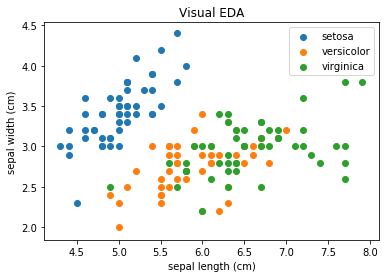

In [0]:
setosa = feature_data[target_data==0]
versicolor = feature_data[target_data==1]
virginica = feature_data[target_data==2]

plt.scatter(setosa[:,0], setosa[:,1], label="setosa")
plt.scatter(versicolor[:,0], versicolor[:,1], label="versicolor")
plt.scatter(virginica[:,0], virginica[:,1], label="virginica")

plt.legend()
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.title("Visual EDA");

In the above step, we used boolean indexing to filter the feature data based on the target data class. This allowed us to create a scatter plot for each of the iris classes and distinguish them by color.

*Observations*: We can see that the "setosa" class typically consists of medium-to-high sepal width with low-to-medium sepal length, while the other two classes have lower width and higher length. The "virginica" class appears to have the largest combination of the two. 

**YOUR TURN:** 
* Which of the iris classes is seperable based on sepal characteristics? **setosa**
* Which of the iris classes is not? **versicolor and virginica**
* Can we (easily) visualize each of the samples w.r.t. all features on the same plot? Why/why not? **No. As the petals and sepals have same feature variables i.e length and width, plotting them on the same graph might not be the effective way to visualize data.**

### Creating a Nearest Neighbors Classifier

Now that we've explored the data a little bit, we're going to use scikit-learn to create a nearest neighbors classifier for the data. Effectively we'll be developing a model whose job it is to build a relationship over input feature data (sepal and petal characteristics) that predicts the iris sample class (e.g. "setosa"). This is an example of a *supervised learning* task; we have all the features and all the target classes.

Model creation in scikit-learn follows a **data prep -> fit -> predict** process. The "fit" function is where the actual model is trained and parameter values are selected, while the "predict" function actually takes the trained model and applies it to the new samples.

First, we load the nearest neighbor library from scikit-learn:

In [0]:
from sklearn import neighbors

Now, we're going to save our feature data into an array called 'X' and our target data into an array called 'y'. We don't *need* to do this, but it is traditional to think of the problem using this notation.

In [0]:
X = feature_data
y = target_data


[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

Next, we create our nearest neighbor classifier object:

In [0]:
knn = neighbors.KNeighborsClassifier(n_neighbors=1)

And then we *fit* it to the data (i.e., train the classifier).

In [0]:
knn.fit(X,y)

 Now we have a model! If you're new to this, you've officially built your first machine learning model. If you use "knn.predict(*[[feature array here]]*)", you can use your trained model to predict the class of a new iris sample. 

**YOUR TURN:**
* What is the predicted class of a new iris sample with feature vector [3,4,5,2]? 
What is its name? array[2] **virginica**
* Do you think this model is overfit or underfit to the iris dataset? Why? 
  **Underfit as the data was not split into training,validation and test sets**
* How many neighbors does our model consider when classifying a new sample? **1**

In [0]:
knn.predict([[3,4,5,2]])

As you may have noted in the previous cell, we've trained this classifier on our *entire dataset*. This typically isn't done in practice and results in overfitting to the data. Here's a bit of a tricky question:

**YOUR TURN:**
* If we use our classifier to predict the classes of the iris samples that were used to train the model itself, what will our overall accuracy be?: **100%**

We can validate our hypothesis fairly easily using either: i) the NumPy technique for calculating accuracy we used earlier in the lab, or ii) scikit-learn's in-house "accuracy_score()" function.

Let's use our technique first:

In [0]:
import numpy as np
accuracy = np.sum(target_data == knn.predict(feature_data)) / target_data.size
print ("Accuracy: ", accuracy * 100, "%")

and then using scikit-learn's customized function:

In [0]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(target_data, knn.predict(feature_data))
print ("Accuracy: ", accuracy * 100, "%")

We see that our classifier has achieved 100% accuracy (and both calculation methods agree)!

**DISCUSSION:** 
* Why do you think the model was able to achieve such a "great" result? The test data and the trained data are similar
* What does this really tell us? When trained data and test data are similar we achieve 100% accuracy
* Do you expect the model to perform this well on new data? No

## Exercise (to be completed on your own)

Let's take the tools we have learned in this lab and put them into practice on a new dataset.

We're going to work with a dataset focused on diabetes. It contains a variety of health metrics for a number of patients, and then in a second object it shows whether or not that patient had diabetes. Download it using the cell below:

In [0]:
from sklearn.datasets import fetch_openml

diabetes_data = fetch_openml(
    name='diabetes',
    cache=False
)
diabetes_data

First off, take a look at the `data`, `target` and `feature_names` entires in the `diabetes_data` dictionary. They contain the information we'll be working with here. Then, create a Pandas DataFrame called `diabetes_df` containing the data and the targets, with the feature names as column headings. If you need help, refer [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) for more detail on how to achieve this.

* What was the average age of participants? **33.240885** [0.5]
* How many participants tested positive? How many tested negative?  **268, 500** [0.5]

In [0]:
### YOUR CODE HERE
import pandas as pd
diabetes_df = pd.DataFrame(diabetes_data.data , columns=diabetes_data.feature_names)
diabetes_df['target']=diabetes_data.target
print(diabetes_df)
age=diabetes_df['age'].mean()
print(diabetes_df['target'].value_counts())
print(age)


The targets are currently a string representing whether or not the patient has diabetes. However, it's more useful for us if this column contains a 1 or a 0 depending on whether the patient has diabetes. Use the [Label Encoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) class from Scikit-Learn to convert the labels into integers. [0.5]

In [0]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
diabetes_df['target']=le.fit_transform(diabetes_df['target'])
diabetes_df

Now we are going to create a classifier to predict whether a patient has diabetes based on their vitals. 

 **Note**:
 
 We should have a training, validation and test set and our main aim is to get the best accuracy on test set. While perfoming the cross-validation, the validation set is selected by the validation function each time, the input to that function should be all of dataset except your test set. 

So, a general guideline to follow will be first split the dataset into train and test (70:30), after this keep the test set aside untouched for final evaluation.
Further, in the training set depending upon the number of folds for cross validation a validation set can be obtained, the model is then iteratively trained and validated on these different sets. Basically you use your training set to generate multiple splits of the Train and Validation sets.

* Using `cross_val_score`, report mean cross validation accuracy on a KNN classifier with K=3 and 10 folds. Remember that the `target` column holds our labels

  **0.7030** [0.5] 

For all the cases mentioned below test accuracy should be computed and reported:

* What accuracy did the model achieve on test set? 
   **67.099%**[1]
* Find a value for K that performs better than this (Note: Try for atleast first 50 values of k). 

What value for K did you use?**k= 17**
What was the performance **The accuracy curve was declining as the number of folds were increased**? (Note: Show some Visual Depiction to compare Model performance)**The visual description was shown at the end of knn classifier session**[2]

In [0]:
from sklearn import neighbors
X=diabetes_df
y = diabetes_df.target
from sklearn.model_selection import train_test_split
#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [0]:
# Create KNN classifier
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 3)
# Fit the classifier to the data
knn.fit(X_train,y_train)

In [0]:
#show first 5 model predictions on the test data
knn.predict(X_test)[0:5]

In [0]:
accu=knn.score(X_test, y_test)*100
print("Accuracy=",accu,"%")

In [0]:
from sklearn.model_selection import cross_val_score
import numpy as np
#create a new KNN model with k=3
knn_cv = KNeighborsClassifier(n_neighbors=3)
#train model with cv of 10 
cv_scores = cross_val_score(knn_cv, X, y, cv=10)
#print each cv score (accuracy) and average them
print(cv_scores)
print("average=" ,np.mean(cv_scores))


In [0]:
from sklearn.model_selection import cross_val_score
import numpy as np
#create a new KNN model
var=[]
for i in range(1,51):
  knn_cv = KNeighborsClassifier(n_neighbors=i)
#train model with cv of 10 
  cv_scores = cross_val_score(knn_cv, X, y, cv=10)
#print each cv score (accuracy) and average them
  print("average[",i,"]:" ,np.mean(cv_scores))
  var.append(np.mean(cv_scores))
print("Max Average CV Score:",(max(var)))

In [0]:
### YOUR CODE HERE
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 50
neighbors_settings = range(1, 51)
for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record test set accuracy
    test_accuracy.append(knn.score(X_test, y_test))
print("Max Test accuracy = ", np.mean(test_accuracy)*100)
print("Max Training accuracy = ", np.mean(training_accuracy)*100)
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig('knn_compare_model')

Take a look at the `skin` feature.

* According to the dataset description in `diabetes_data['DESCR']`, what does this feature represent? **This feature gives information about the authors,source,citations and an overview of the diabetes data in the imported file.**  [0.25]
* Are there any unusual entries in this column? If so, why? [0.25] **The data consists of zero values in the skin and insu feature**

Use the `SimpleImputer` class from scikit-learn to impute missing values for the `skin` and `insu` columns. Overwrite the existing `skin` and `insu` columns with these new values.[1]

In [0]:
### YOUR CODE HERETake a look at the skin feature.
print(diabetes_df.skin,diabetes_df.insu)


print(diabetes_data['DESCR'])
#
#

In [0]:
### YOUR CODE HERE
diabetes_data['DESCR']

from sklearn.impute import SimpleImputer

imp = SimpleImputer(
    missing_values=0,
    strategy='mean',
    verbose=1 )

imp.fit(
    diabetes_df.skin.values.reshape((-1,1)) #we have to do the reshape operation because we are only using one feature.
)

diabetes_df.skin = imp.transform(diabetes_df.skin.values.reshape((-1,1)))


imp1 = SimpleImputer(
    missing_values=0,
    strategy='mean',
    verbose=1
)

imp1.fit(
    diabetes_df.insu.values.reshape((-1,1)) #we have to do the reshape operation because we are only using one feature.
)

diabetes_df.insu = imp1.transform(diabetes_df.insu.values.reshape((-1,1)))


diabetes_df

Re-split the data and fit a new classifier. [2.5]


Note: Test accuracy should be computed and reported below
* Is performance better or worse with imputed values? Why might this be? (Note: Show some Visual Depiction to compare Model performance) **The accuracy increased to 72.72% and the cross validation score was changed to 0.7539986329460014 with k=18**


In [0]:
from sklearn import neighbors
# Create KNN classifier
from sklearn.neighbors import KNeighborsClassifier
X=diabetes_df
y = diabetes_df.target
from sklearn.model_selection import train_test_split
#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)


# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 3)
# Fit the classifier to the data
knn.fit(X_train,y_train)
knn.predict(X_test)[0:5]


#cv scores
from sklearn.model_selection import cross_val_score
import numpy as np

#cv for k=1 to 5 
from sklearn.model_selection import cross_val_score
import numpy as np
#create a new KNN model

from sklearn.model_selection import cross_val_score
import numpy as np
#create a new KNN model
var=[]
for i in range(1,51):
  knn_cv = KNeighborsClassifier(n_neighbors=i)
#train model with cv of 10 
  cv_scores = cross_val_score(knn_cv, X, y, cv=10)
#print each cv score (accuracy) and average them
  print("average[",i,"]:" ,np.mean(cv_scores))
  var.append(np.mean(cv_scores))
print("Max Average CV Score:",(max(var)))
#visual representation
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 50
neighbors_settings = range(1, 51)
for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record test set accuracy
    test_accuracy.append(knn.score(X_test, y_test))
accu=knn.score(X_test, y_test)*100
print("Accuracy=",accu,"%")
#plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig('knn_compare_model')

References

Train, Test and Validation set:

https://towardsdatascience.com/train-validation-and-test-sets-72cb40cba9e7

